In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns

**Замечание: 1** Предполагается, что для решения заданий  № 1-3 будут использоваться разные тесты.

<div class="alert alert-info">
<b>Задание № 1 </b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

Различие в эффекте у пациентов незначительно
pvalue = 0.08511123469659897


<AxesSubplot:ylabel='Count'>

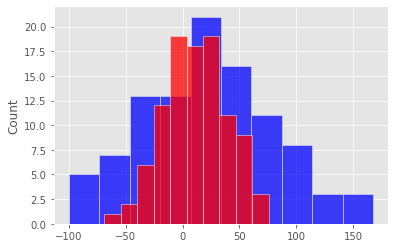

In [2]:
H0 = 'Различие в эффекте у пациентов незначительно'
H1 = 'Имеется статистически значимое различие в эффекте у пациентов'

significance = 0.05

np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

t, pvalue = stats.ttest_ind(A, B, equal_var=False)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

sns.histplot(B, bins=10, color='b')
sns.histplot(A, bins=10, color='r')

<div class="alert alert-info">
<b>Задание № 2 </b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

Имеется статистически значимое различие в эффекте у пациентов
pvalue = 0.03238579156467659


<AxesSubplot:ylabel='Count'>

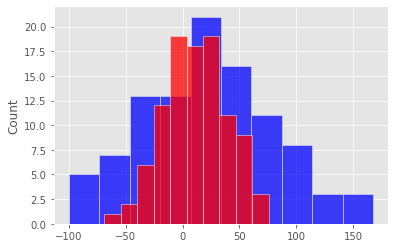

In [3]:
H0 = 'Различие в эффекте у пациентов незначительно'
H1 = 'Имеется статистически значимое различие в эффекте у пациентов'

significance = 0.05

np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

t, pvalue = stats.ttest_rel(A, B)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

sns.histplot(B, bins=10, color='b')
sns.histplot(A, bins=10, color='r')

## Вывод
<div class="alert alert-success">
Для заданий 1 и 2 я сделаю общий вывод, так как мы работаем с одними и теми же данными, меняется лишь отношение между выборками.

 - В первом случае мы имеем дело с независимыми выборками: разные группы людей получают разные препараты. Для сравнения средних значений я использую t-тест Стьюдента для двух выборок.
 - Во втором слечае группа людей одна, но мы исследуем ее до получения препарата и после, поэтому это зависимые выборки. В этом случае я сравниваю средние значения парным t-тестом Стьюдента.

При уровне значимости 5% тесты дают разные результаты. При независимых выборках p-value больше уровня значимости и мы не можем отвергнуть нулевую гипотезу о том, что различие в эффекте у пациентов незначительно. В случае зависимых выборок p-value меньше уровня значимости и мы принимаем альтернативную гипотезу о том, что имеется статистически значимое различие в эффекте у пациентов. Можно заключить, что парный t-тест имеет более строгие критерии похожести между выборками в отличие от обычного t-теста.
</div>

<div class="alert alert-info">
<b>Задание № 3 </b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
    
</div>

In [4]:
H0 = 'Различие в распределениях результатов незначительно'
H1 = 'Различие распределений между группами статистически значимое'

significance = 0.05

water = [1, 2, 3, 4, 2, 4, 2, 4, 5, 2, 3, 4, 2, 1, 3, 4, 3, 2, 5, 1]
nutri = [1, 2, 4, 6, 5, 6, 7, 5, 4, 5, 6, 7, 4, 3, 5, 5, 6, 5, 4, 3, 5]
mineral = [2, 1, 1, 3, 2, 4, 2, 4, 5, 4, 3, 2, 3, 2, 3, 1, 3, 4, 5, 1, 4]

f, pvalue = stats.f_oneway(water, nutri, mineral)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Различие распределений между группами статистически значимое
pvalue = 2.9240047906326866e-05


In [5]:
t, pvalue = stats.ttest_ind(nutri, mineral)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Различие распределений между группами статистически значимое
pvalue = 0.00012136733401245426


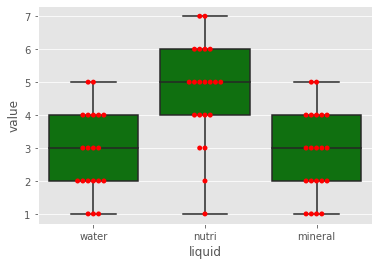

In [6]:
df = pd.concat([pd.DataFrame({'liquid': 'water', 'value': water}),
                pd.DataFrame({'liquid': 'nutri', 'value': nutri}),
                pd.DataFrame({'liquid': 'mineral', 'value': mineral})])

sns.boxplot(x='liquid', y='value', data=df, color='g')
sns.swarmplot(x='liquid', y='value', data=df, color='r')
plt.show()

## Вывод
<div class="alert alert-success">
Дисперсионный анализ показал наличие статистически значимого различия в распределениях между группами, а визуальный анализ подтвердил этот результат. На боксплоте видно, что распределения для огурцов, поливаемых водой и минералкой практически идентичны, в то время как межквартильный размах распределения для огурцов, поливаемых удобрением лежит полностью выше остальных групп. Можно говорить о наличии существенного эффекта от использования удобрения вместо воды или минералки. Это также подверждается результатом t-теста для огурцов на удобрении и на минералке.
</div>

<div class="alert alert-info">
<b>* Задание *</b>
    
Проанализируем ещё один датасет. Здесь снова данные по урожайности в зависимости от типа используемого удобрения. 
    
Предлагаю самостоятельно исследовать данные и проверить гипотезы, используя тесты, изученные в течение курса.
Допустим, вы должны помочь агроному выбрать тип удобрения. Какой вы посоветуете и почему?

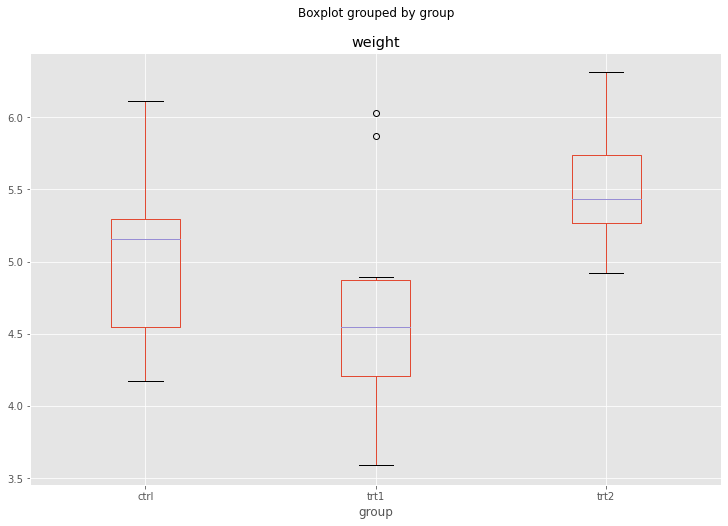

In [7]:
data = pd.read_csv('PlantGrowth.csv')
data.boxplot('weight', by='group', figsize=(12, 8));

In [8]:
ctrl = data[data['group'] == 'ctrl']['weight']
trt1 = data[data['group'] == 'trt1']['weight']
trt2 = data[data['group'] == 'trt2']['weight']

In [9]:
H0 = 'Различие в распределениях результатов незначительно'
H1 = 'Различие распределений между группами статистически значимое'

significance = 0.05

f, pvalue = stats.f_oneway(ctrl, trt1, trt2)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Различие распределений между группами статистически значимое
pvalue = 0.0159099583256229


In [10]:
t, pvalue = stats.ttest_ind(ctrl, trt2)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Различие распределений между группами статистически значимое
pvalue = 0.04685138491157358


## Вывод
<div class="alert alert-success">
    
На уровне значимости 5% дисперсионный анализ показал наличие статистически значимого различия в распределениях между группами. На боксплоте видно, что распределение в группе `trt-2` ближе к верхним границам графика относительно других групп, что должно говорить о большей урожайности. Сравнение с помощью t-теста групп `trt-2` и `ctrl` показало, что p-value "превосходит" уровень значимости 5%, поэтому агроному можно рекомендовать использовать удобрение `trt-2`.

</div>

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [11]:
pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

C:\Users\79111\AppData\Local\Temp\ipykernel_2516\2327316922.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  pokemon = pd.read_csv('pokemon.csv', error_bad_lines=False)


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [12]:
# Отфильтруем покемонов которые относятся к обоим классам
filtered = pokemon[~(pokemon['Class 1'].isin(['Grass', 'Rock']) & pokemon['Class 2'].isin(['Grass', 'Rock']))]

grass = filtered[(filtered['Class 1'] == 'Grass') | (filtered['Class 2'] == 'Grass')].Attack
rock = filtered[(filtered['Class 1'] == 'Rock') | (filtered['Class 2'] == 'Rock')].Attack

# Сравним средние значения обычной атаки у двух классов
print('Усредненная обычная атака в классе "Grass":', round(grass.mean()))
print('Усредненная обычная атака в классе "Rock":', round(rock.mean()))

Усредненная обычная атака в классе "Grass": 74
Усредненная обычная атака в классе "Rock": 92


Покемоны в классе "Rock" имеют более сильную обычную атаку
pvalue = 0.0009640546913545304


<AxesSubplot:xlabel='Attack', ylabel='Count'>

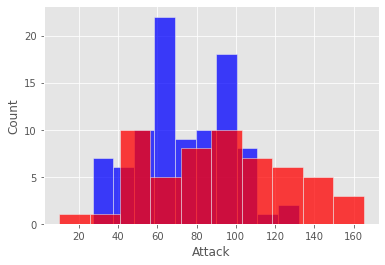

In [13]:
# Проверим является ли это различие статистически значимым
H0 = 'Различие незначительно'
H1 = 'Покемоны в классе "Rock" имеют более сильную обычную атаку'

significance = 0.05

t, pvalue = stats.ttest_ind(grass, rock, equal_var=False)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

sns.histplot(grass, bins=10, color='b')
sns.histplot(rock, bins=10, color='r')

## Вывод
<div class="alert alert-success">
    
Профессор Оук на этот раз ошибся! На самом деле более сильную обычную атаку имеют покемоны в классе `Rock`, а не в классе `Grass`. По крайней мере если рассматривать классы в целом.
</div>

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [14]:
# Отфильтруем покемонов которые относятся к обоим классам
filtered = pokemon[~(pokemon['Class 1'].isin(['Water', 'Normal']) & pokemon['Class 2'].isin(['Water', 'Normal']))]

water = filtered[(filtered['Class 1'] == 'Water') | (filtered['Class 2'] == 'Water')].Speed
normal = filtered[(filtered['Class 1'] == 'Normal') | (filtered['Class 2'] == 'Normal')].Speed

# Сравним средние значения скорости движения у двух классов
print('Усредненная скорость движения в классе "Water":', round(water.mean()))
print('Усредненная скорость движения в классе "Normal":', round(normal.mean()))

Усредненная скорость движения в классе "Water": 65
Усредненная скорость движения в классе "Normal": 72


Покемоны в классе "Normal" более быстрые
pvalue = 0.03694772338274292


<AxesSubplot:xlabel='Speed', ylabel='Count'>

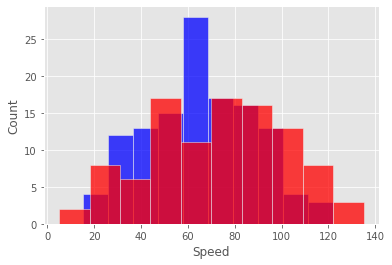

In [15]:
# Проверим является ли это различие статистически значимым
H0 = 'Различие незначительно'
H1 = 'Покемоны в классе "Normal" более быстрые'

significance = 0.05

t, pvalue = stats.ttest_ind(water, normal, equal_var=False)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

sns.histplot(water, bins=10, color='b')
sns.histplot(normal, bins=10, color='r')

## Вывод
<div class="alert alert-success">
    
Профессор Оук опять не прав! На самом деле статистичеки более быстрыми являются покемоны в классе `Normal`, а не в классе `Water`. По крайней мере при уровне значимости 5%.
</div>

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treated_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [16]:
# Покемоны, которые принимали сыворотку увеличения скорости
treated_pokemon = ['Mega Beedrill', 'Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

treated = pokemon[pokemon['Name'].isin(treated_pokemon)].Speed
untreated = pokemon[~pokemon['Name'].isin(treated_pokemon)].Speed

print('Усредненная скорость движения вакцинированных покемонов:', round(treated.mean()))
print('Усредненная скорость движения невакцинированных покемонов:', round(untreated.mean()))

Усредненная скорость движения вакцинированных покемонов: 145
Усредненная скорость движения невакцинированных покемонов: 68


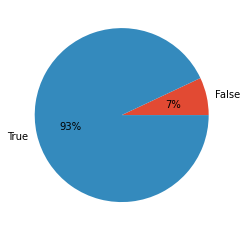

In [17]:
# Проведем сравнение скорости вакцинированных покемонов с остальными покемонами из 1000 случайных выборок
significance = 0.05
result = np.zeros(1000, dtype=bool)

for i in range(1000):
    t, pvalue = stats.ttest_ind(treated, untreated.sample(4), equal_var=False)
    if pvalue < significance:
        result[i] = True

unique, counts = np.unique(result, return_counts=True)
percentage = counts/result.size
plt.pie(percentage, labels=unique, autopct='%.0f%%');

## Вывод
<div class="alert alert-success">
    
Средняя скорость покемонов, получивших сыворотку более чем в два раза больше чем у всех невакцинированных. Но сравнивать две настолько разные по размеру выборки не корректно, поэтому я провел 1000 t-тестов сравнивая распределения скорости покемонов из массива `treated_pokemon` со случайными выборками невакцинированных покемонов такого же размера. В результате статистически значимые различия на уровне значимости 5% я получил в 93% случаев. Тем не менее результаты этого теста невозможно интерпретировать для ответа на вопрос работает ли сыворотка доктора Оука, поскольку у нас нет данных о том какую скорость изначально имели покемоны, получившие сыворотку.
</div>

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сумм и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [18]:
legendary = pokemon[pokemon['Legendary']]
legendary_sum = legendary['HP'] + legendary['Attack'] + legendary['Defense']
legendary_product = legendary['HP'] * legendary['Attack'] * legendary['Defense']

non_legendary = pokemon[~pokemon['Legendary']]
non_legendary_sum = non_legendary['HP'] + non_legendary['Attack'] + non_legendary['Defense']
non_legendary_product = non_legendary['HP'] * non_legendary['Attack'] * non_legendary['Defense']

print('Средняя сумма характеристик легендарных покемонов:', round(legendary_sum.mean()))
print('Средняя сумма характеристик остальных покемонов:', round(non_legendary_sum.mean()))
print()
print('Среднее произведение характеристик легендарных покемонов:', round(legendary_product.mean()))
print('Среднее произведение характеристик остальных покемонов:', round(non_legendary_product.mean()))

Средняя сумма характеристик легендарных покемонов: 309
Средняя сумма характеристик остальных покемонов: 214

Среднее произведение характеристик легендарных покемонов: 1085942
Среднее произведение характеристик остальных покемонов: 425041


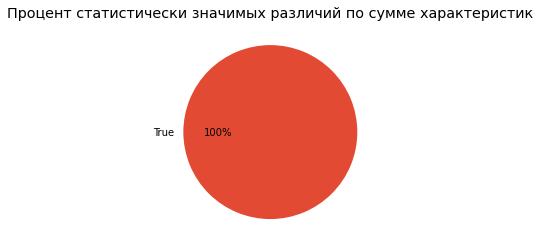

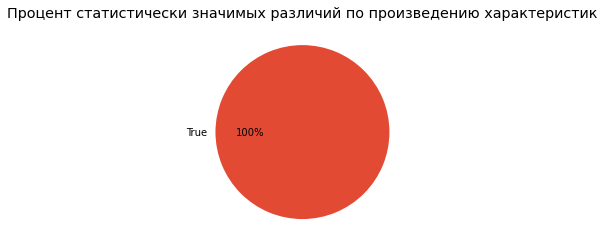

In [19]:
# Проведем сравнение характеристик легендарных покемонов с остальными покемонами из 1000 случайных выборок
significance = 0.001
result_by_sum = np.zeros(1000, dtype=bool)
result_by_product = np.zeros(1000, dtype=bool)

for i in range(1000):
    t, pvalue = stats.ttest_ind(legendary_sum, non_legendary_sum.sample(len(legendary)), equal_var=False)
    if pvalue < significance:
        result_by_sum[i] = True
    
    t, pvalue = stats.ttest_ind(legendary_product, non_legendary_product.sample(len(legendary)), equal_var=False)
    if pvalue < significance:
        result_by_product[i] = True


unique, counts = np.unique(result_by_sum, return_counts=True)
percentage = counts/result_by_sum.size
plt.pie(percentage, labels=unique, autopct='%.0f%%')
plt.title('Процент статистически значимых различий по сумме характеристик')
plt.show()

unique, counts = np.unique(result_by_product, return_counts=True)
percentage = counts/result_by_product.size
plt.pie(percentage, labels=unique, autopct='%.0f%%')
plt.title('Процент статистически значимых различий по произведению характеристик')
plt.show()

## Вывод
<div class="alert alert-success">
    
Средние сумма и произведение характеристик `HP`,`Attack`,`Defense` у легендарных покемонов заметно выше, чем у других покемонов. Для статистического сравнения разных по размеру выборок я опять же воспользовался множеством из 1000 t-тестов, в которых провел сопоставление распределений средних характеристик легендарных покемонов с параметрами других покемонов из случайно генерируемых выборок того же размера. На этот раз уровень значимости я установил 0.1% и получил статистически значимые различия между выборками в 100% случаев. Доктор Оук в этот раз оказался прав! Легендарные покемоны действительно значительно превосходят своих собратьев по параметрам `HP`,`Attack`,`Defense`.
</div>

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сумм и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [20]:
# Разобъем покемонов на группы в зависимости от их класса
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']

rock = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')].Defense
ground = pokemon[(pokemon['Class 1'] == 'Ground') | (pokemon['Class 2'] == 'Ground')].Defense
steel = pokemon[(pokemon['Class 1'] == 'Steel') | (pokemon['Class 2'] == 'Steel')].Defense
ice = pokemon[(pokemon['Class 1'] == 'Ice') | (pokemon['Class 2'] == 'Ice')].Defense

In [21]:
# Оценим действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо
H0 = 'Различие в уровне защиты незначительно'
H1 = 'Различие в уровне защиты статистически значимое'

significance = 0.05

f, pvalue = stats.f_oneway(rock, ground, steel, ice)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

Различие в уровне защиты статистически значимое
pvalue = 1.231528168152447e-06


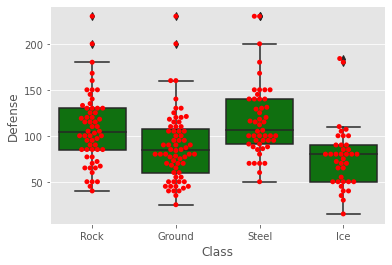

In [22]:
# Теперь оценим это визуально
df = pd.concat([pd.DataFrame({'Class': 'Rock', 'Defense': rock}),
                pd.DataFrame({'Class': 'Ground', 'Defense': ground}),
                pd.DataFrame({'Class': 'Steel', 'Defense': steel}),
                pd.DataFrame({'Class': 'Ice', 'Defense': ice})])

sns.boxplot(x='Class', y='Defense', data=df, color='g')
sns.swarmplot(x='Class', y='Defense', data=df, color='r')
plt.show()

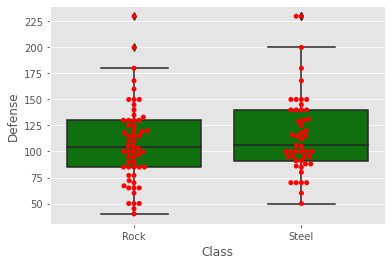

Различие в уровне защиты незначительно
pvalue = 0.20801798048000042


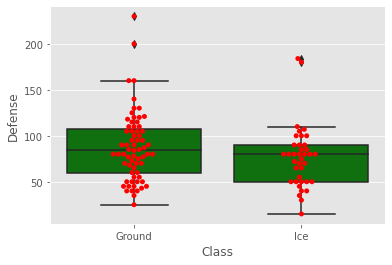

Различие в уровне защиты незначительно
pvalue = 0.14053946217093266


In [23]:
# Разделим исследуемые группы покемонов на две пары и оценим их различия в уровне защиты теперь
group_1 = ['Rock', 'Steel']
group_2 = ['Ground', 'Ice']

sns.boxplot(x='Class', y='Defense', data=df[df.Class.isin(group_1)], color='g')
sns.swarmplot(x='Class', y='Defense', data=df[df.Class.isin(group_1)], color='r')
plt.show()

f, pvalue = stats.f_oneway(rock, steel)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

sns.boxplot(x='Class', y='Defense', data=df[df.Class.isin(group_2)], color='g')
sns.swarmplot(x='Class', y='Defense', data=df[df.Class.isin(group_2)], color='r')
plt.show()

f, pvalue = stats.f_oneway(ground, ice)

if pvalue < significance:
    print(H1)
else:
    print(H0)
print('pvalue =', pvalue)

## Вывод
<div class="alert alert-success">
    
Дисперсионный анализ показал, что классы покемонов `Rock, Ground, Steel, Ice` статистически значимо отличаются по уровню защиты. В этом доктор Оук оказался не прав. Но визуальный анализ показал, что среди этих классов есть пары более похожие по уровню защиты, а именно пара классов `Rock, Steel` и пара `Ground, Ice`. Статистический анализ этих пар по отдельности как раз показал незначительное различие в уровне защиты. Возможно доктору Оуку стоит более внимательно наблюдать за покемонами!
</div>